In [8]:
import numpy as np
def max_expected_return(a,n,c):
    
    var = (-c/4) 
    -(((c**2)*a)/ (4*((c**3 * a**3 + 24*c*a**2*n**2 - 4*np.sqrt(3*c**4*a**5*n**2+ 36*c**2*a**4*n**4))**(1/3))))
    var2 = (((c**3*a**3 + 24*c*a**2*n**2 - 4*((np.sqrt(3*c**4*a**5*n**2 + 36*c**2*a**4*n**4)))))**(1/3))/4*a
    res = var - var2
    return res 

In [2]:
2**3 * 2**3

64

In [3]:
(2**3)*(2**3)

64

In [4]:
2*2**2*2**2

32

In [10]:
max_expected_return(180.9670, 0.1538, 0.015)

-39.59272238934293

In [11]:
def mer(a,n,c):
    var1 = -c/4
    denom1 = (c**3*a**3) + (24*c*a**2*n**2)
    denom2 = 4*(np.sqrt(((3*c**4*a**5*n**2) + (36*c**2*a**4*n**4))))
    denom3 = 4 * ((denom1 - denom2)**(1/3))
    var2 = (c**2*a) / denom3
    numer1 = c**3*a**3 + (24*c*a**2*n**2)
    numer2 = 4 * np.sqrt((3*c**4*a**5*n**2 + 36*c**2*a**4*n**4))
    numer3 = ((numer1 - numer2))**(1/3)
    var3 = numer3 / (4*a)
    res = var1 - var2 - var3
    return res

In [13]:
mer(180.967, 0.1538, 0.001)

-0.00487500478007779

In [14]:
import pandas as pd
df = pd.read_csv('Sample_set.csv')
df

,CO1,CO2,orig,t1
0,45.68,46.05,-0.008067,-0.008067
1,45.57,45.95,-0.008304,-0.008067
2,45.59,45.96,-0.008083,-0.008304
3,45.57,45.96,-0.008522,-0.008083
4,45.58,45.97,-0.008520,-0.008522
...,...,...,...,...
10929,51.77,51.45,0.006200,0.005036
10930,51.79,51.43,0.006975,0.006200
10931,51.84,51.33,0.009887,0.006975
10932,51.66,51.23,0.008358,0.009887


In [15]:
from sklearn.linear_model import LinearRegression

In [24]:
y = np.array(df.orig)
x = np.array(df.t1)

t = int(0.9 *len(df))
X_train = x[:t]
Y_train = y[:t]
X_test = x[t:]
Y_test = y[t:]

In [221]:
linear = LinearRegression().fit(x.reshape(-1,1), y)

print ("coef1: ", round(linear.coef_[0],5))
print ("intercept: ", round(linear.intercept_,5))
print (linear)

coef1:  0.95146
intercept:  -0.00035
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [30]:
a = mer(0.95146, -0.00035, 0.001)
m = -a

In [32]:
df['bs'] = np.where(df.orig <= a, 1, 0)
df['bs'] = np.where(df.orig >= m, -1, df.bs)

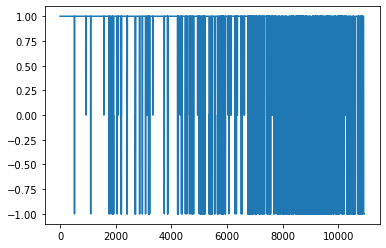

In [75]:
df.bs.plot()

In [76]:
df.bs = np.where(df.bs == 0 , df.bs.shift(-1), df.bs)

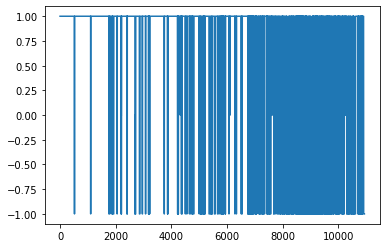

In [77]:
df.bs.plot()

In [41]:
df['CO1_ret'] = np.log(df.CO1 / df.CO1.shift())
df['CO2_ret'] = np.log(df.CO2 / df.CO2.shift())

In [78]:
df['pnl'] = df.bs.shift(1) * df.CO1_ret - df.bs.shift(1) * df.CO2_ret

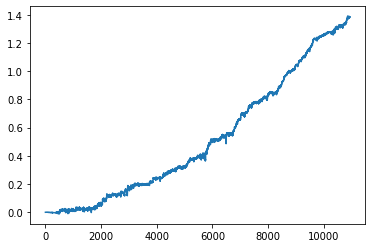

In [79]:
df.pnl.cumsum().plot()

In [170]:
t_cost = (0.000001, 0.0001, 0.001, 0.002, 0.004, 0.006, 0.01)
res = []
for i in t_cost:
    res.append(mer(180.967, 0.1538, i))

Text(0, 0.5, 'Enrty Threshold (a)')

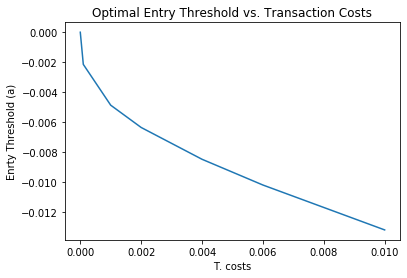

In [196]:
import matplotlib.pyplot as plt
plt.plot(t_cost, res)
plt.title('Optimal Entry Threshold vs. Transaction Costs')
plt.xlabel('T. costs')
plt.ylabel('Enrty Threshold (a)')

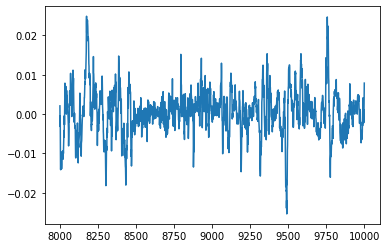

In [74]:
df.orig[8000:10000].plot()

In [94]:
df

,CO1,CO2,orig,t1,bs,pnl,CO1_ret,CO2_ret
0,45.68,46.05,-0.008067,-0.008067,1.0,NaN,NaN,NaN
1,45.57,45.95,-0.008304,-0.008067,1.0,-0.000237,-0.002411,-0.002174
2,45.59,45.96,-0.008083,-0.008304,1.0,0.000221,0.000439,0.000218
3,45.57,45.96,-0.008522,-0.008083,1.0,-0.000439,-0.000439,0.000000
4,45.58,45.97,-0.008520,-0.008522,1.0,0.000002,0.000219,0.000218
...,...,...,...,...,...,...,...,...
10929,51.77,51.45,0.006200,0.005036,-1.0,-0.001165,0.000193,-0.000971
10930,51.79,51.43,0.006975,0.006200,-1.0,-0.000775,0.000386,-0.000389
10931,51.84,51.33,0.009887,0.006975,-1.0,-0.002911,0.000965,-0.001946
10932,51.66,51.23,0.008358,0.009887,-1.0,0.001528,-0.003478,-0.001950


In [108]:
trade_count = 0 
for i in range(1,len(df)):
    if df.loc[i, 'bs'] != df.loc[i-1, 'bs']:
        trade_count += 1
trade_count

664

In [134]:
df.pnl.mean()

4.052692606002878e-06

In [161]:
def backtest(df, t_c):
    # create results dictionary
    res_df = pd.DataFrame()
    pnl_vectors = pd.DataFrame()
    for tc in t_c:
        res = {}
        res['transaction cost'] = tc
        #find a & m using maximum expected return formula
        a = mer(0.95146, -0.00035, tc)
        m = -a
        #store result
        res['Optimal Trade Entry (a)'] = a
        #generate vecoried buy-sell signals 
        #buy when Xt <= a
        df['bs'] = np.where(df.orig <= a, 1, 0)
        #sell when Xt >= m 
        df['bs'] = np.where(df.orig >= m, -1, df.bs)
        #fill neutral signals with previous buy/sell signal 
        df.bs = np.where(df.bs == 0 , df.bs.shift(-1), df.bs)
        #find pnl
        df['pnl'] = df.bs.shift(1) * df.CO1_ret - df.bs.shift(1) * df.CO2_ret
        #store vetor in result dataframe
        pnl_vectors['pnl_tc_' + str(tc)] = df.pnl
        res['total return']= df.pnl.sum()
        res['Sharpe'] = df.pnl.mean() / df.pnl.std() * np.sqrt(6*24*252) 
        trade_count = 0 
        for i in range(1,len(df)):
            if df.loc[i, 'bs'] != df.loc[i-1, 'bs']:
                trade_count += 1
        res['Trade_count'] = trade_count
        res['avg hold period (hrs)'] = 2880 / trade_count 
        res_df = res_df.append(res, ignore_index = True)
    return res_df, pnl_vectors
        
        
        

In [187]:
t, pnl_vecs = backtest(df, [0.001, 0.002, 0.003, 0.004, 0.005, 0.006])

Text(0.5, 1.0, 'Cumulative Returns')

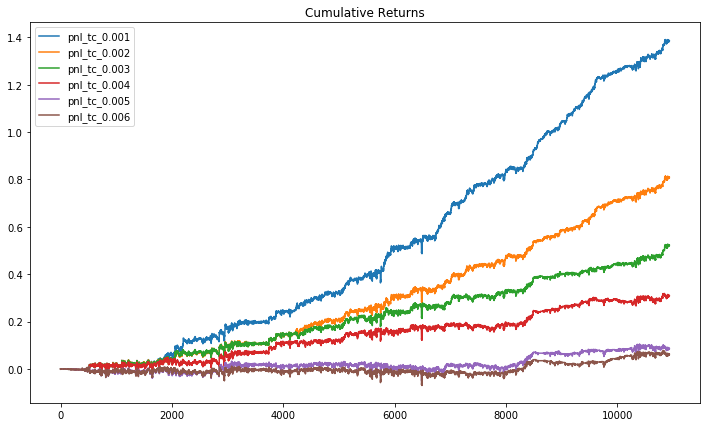

In [200]:
pnl_vecs.cumsum().plot(figsize=(12,7))
plt.title('Cumulative Returns')

In [189]:
col_names = t.columns.to_list()

In [190]:
t[col_names]

,Optimal Trade Entry (a),Sharpe,Trade_count,avg hold period (hrs),total return,transaction cost
0,-0.000876,8.557439,664.0,4.337349,1.384365,0.001
1,-0.001578,5.010465,749.0,3.845127,0.808118,0.002
2,-0.002305,3.258727,794.0,3.627204,0.521344,0.003
3,-0.003042,1.955694,794.0,3.627204,0.308615,0.004
4,-0.003784,0.551772,774.0,3.720930,0.085591,0.005
5,-0.004528,0.399373,732.0,3.934426,0.061033,0.006


In [191]:
col_names = ['transaction cost',
            'Optimal Trade Entry (a)',
            'total return',
            'Sharpe',
            'Trade_count',
            'avg hold period (hrs)']
t[col_names]

,transaction cost,Optimal Trade Entry (a),total return,Sharpe,Trade_count,avg hold period (hrs)
0,0.001,-0.000876,1.384365,8.557439,664.0,4.337349
1,0.002,-0.001578,0.808118,5.010465,749.0,3.845127
2,0.003,-0.002305,0.521344,3.258727,794.0,3.627204
3,0.004,-0.003042,0.308615,1.955694,794.0,3.627204
4,0.005,-0.003784,0.085591,0.551772,774.0,3.720930
5,0.006,-0.004528,0.061033,0.399373,732.0,3.934426


Text(0.5, 0, 'Transaction cost')

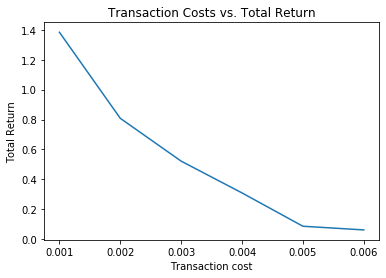

In [204]:
plt.plot(t['transaction cost'], t['total return'])
plt.title('Transaction Costs vs. Total Return')
plt.ylabel('Total Return')
plt.xlabel('Transaction cost')

In [205]:
import math
from math import sqrt, exp, log  # exp(n) == e^n, log(n) == ln(n)
import scipy.optimize as so
import numpy as np

def __compute_log_likelihood(params, *args):
    '''
    Compute the average Log Likelihood, this function will by minimized by scipy.
    Find in (2.2) in linked paper

    returns: the average log likelihood from given parameters
    '''
    # functions passed into scipy's minimize() needs accept one parameter, a tuple of
    #   of values that we adjust to minimize the value we return.
    #   optionally, *args can be passed, which are values we don't change, but still want
    #   to use in our function (e.g. the measured heights in our sample or the value Pi)

    theta, mu, sigma = params
    X, dt = args
    n = len(X)

    sigma_tilde_squared = sigma ** 2 * (1 - exp(-2 * mu * dt)) / (2 * mu)
    summation_term = 0

    for i in range(1, len(X)):
        summation_term += (X[i] - X[i - 1] * exp(-mu * dt) - theta * (1 - exp(-mu * dt))) ** 2

    summation_term = -summation_term / (2 * n * sigma_tilde_squared)

    log_likelihood = (-log(2 * math.pi) / 2) + (-log(sqrt(sigma_tilde_squared))) + summation_term

    return -log_likelihood
    # since we want to maximize this total log likelihood, we need to minimize the
    #   negation of the this value (scipy doesn't support maximize)


def estimate_coefficients_MLE(X, dt, tol=1e-4):
    '''
    Estimates Ornstein-Uhlenbeck coefficients (θ, µ, σ) of the given array
    using the Maximum Likelihood Estimation method

    input: X - array-like time series data to be fit as an OU process
           dt - time increment (1 / days(start date - end date))
           tol - tolerance for determination (smaller tolerance means higher precision)
    returns: θ, µ, σ, Average Log Likelihood
    '''

    bounds = ((None, None), (1e-5, None), (1e-5, None))  # theta ∈ ℝ, mu > 0, sigma > 0
                                                           # we need 1e-10 b/c scipy bounds are inclusive of 0, 
                                                           # and sigma = 0 causes division by 0 error
    theta_init = np.mean(X)
    initial_guess = (theta_init, 100, 100)  # initial guesses for theta, mu, sigma
    result = so.minimize(__compute_log_likelihood, initial_guess, args=(X, dt), bounds=bounds)
    theta, mu, sigma = result.x 
    max_log_likelihood = -result.fun  # undo negation from __compute_log_likelihood
    # .x gets the optimized parameters, .fun gets the optimized value
    return theta, mu, sigma, max_log_likelihood

In [207]:
estimate_coefficients_MLE(df['orig'], 1/len(df))

(-0.007068127985201548,
 100.44085596686281,
 0.29529387560179543,
 4.455260834259968)

In [216]:
def backtest2(df, t_c):
    # create results dictionary
    res_df = pd.DataFrame()
    pnl_vectors = pd.DataFrame()
    for tc in t_c:
        res = {}
        res['transaction cost'] = tc
        #find a & m using maximum expected return formula
        a = mer(0.95146, 0.003, tc)
        m = -a
        #store result
        res['Optimal Trade Entry (a)'] = a
        #generate vecoried buy-sell signals 
        #buy when Xt <= a
        df['bs'] = np.where(df.orig <= a, 1, 0)
        #sell when Xt >= m 
        df['bs'] = np.where(df.orig >= m, -1, df.bs)
        #fill neutral signals with previous buy/sell signal 
        df.bs = np.where(df.bs == 0 , df.bs.shift(-1), df.bs)
        #find pnl
        df['pnl'] = df.bs.shift(1) * df.CO1_ret - df.bs.shift(1) * df.CO2_ret
        #store vetor in result dataframe
        pnl_vectors['pnl_tc_' + str(tc)] = df.pnl
        res['total return']= df.pnl.sum()
        res['Sharpe'] = df.pnl.mean() / df.pnl.std() * np.sqrt(6*24*252) 
        trade_count = 0 
        for i in range(1,len(df)):
            if df.loc[i, 'bs'] != df.loc[i-1, 'bs']:
                trade_count += 1
        res['Trade_count'] = trade_count
        res['avg hold period (hrs)'] = 2880 / trade_count 
        res_df = res_df.append(res, ignore_index = True)
    return res_df, pnl_vectors

In [217]:
second_set, second_df = backtest2(df, [0.0001, 0.0002, 0.001, 0.002])

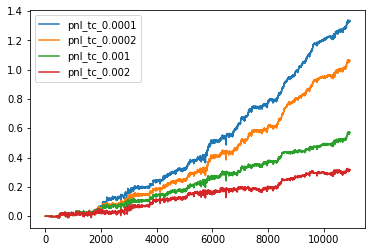

In [218]:
second_df.cumsum().plot()

In [224]:
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(df.orig, order=(1, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                   orig   No. Observations:                10934
Model:                     ARMA(1, 0)   Log Likelihood               48801.301
Method:                       css-mle   S.D. of innovations              0.003
Date:                Mon, 04 Jan 2021   AIC                         -97596.602
Time:                        17:09:23   BIC                         -97574.703
Sample:                             0   HQIC                        -97589.222
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.001    -13.139      0.000      -0.008      -0.006
ar.L1.orig     0.9514      0.003    323.151      0.000       0.946       0.957
                                    Roots           

In [229]:
print(res.params[1])

0.9513703104138301
